<a href="https://colab.research.google.com/github/heejeongJ/DL_pt/blob/Implementing-Deep-Neural-Networks-%232/lrDowndataUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [41]:
num_data = 2500
num_epoch = 100000
noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)
x = init.uniform_(torch.Tensor(num_data,1), -20, 20)
y = (x**3) + x*5 + 3
y_noise = y + noise

In [42]:
model = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 20),
    nn.ReLU(),
  nn.Linear(20, 10),
    nn.ReLU(),
  nn.Linear(10, 1),
)
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.00002)

In [43]:
loss_array = []
for i in range(num_epoch) :
  optimizer.zero_grad()
  output = model(x)

  loss = loss_func(output, y_noise)
  loss.backward()
  optimizer.step()

  loss_array.append(loss.detach().numpy())

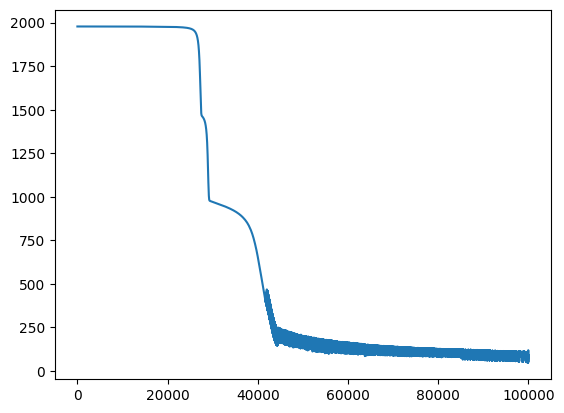

In [44]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

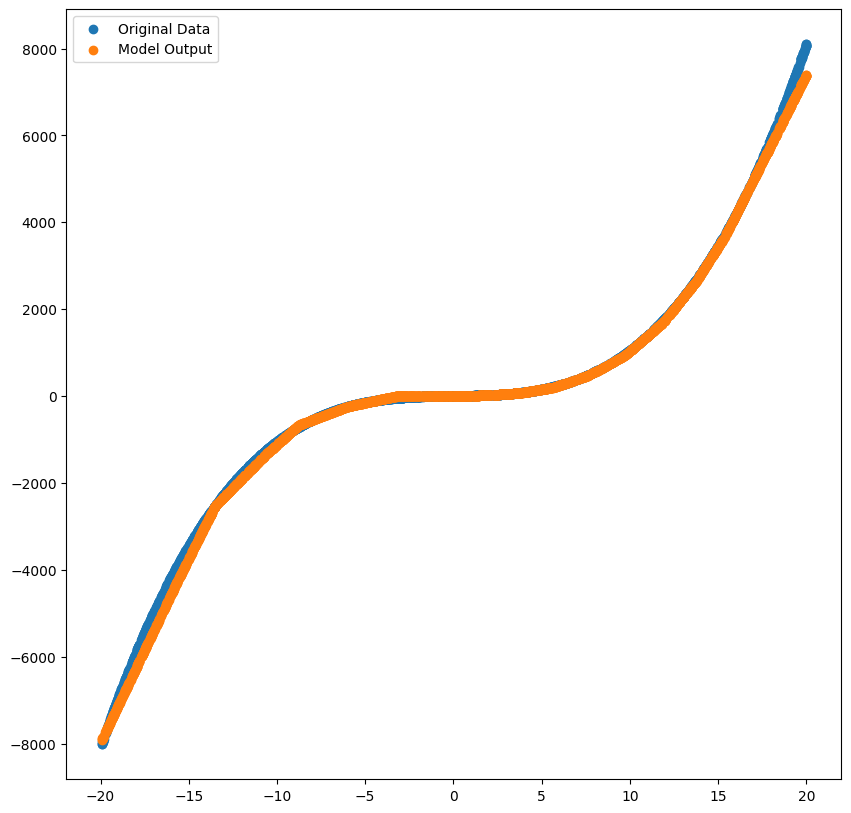

In [45]:
plt.figure(figsize=(10, 10))
plt.scatter(x.detach().numpy(),y_noise, label = "Original Data")
plt.scatter(x.detach().numpy(), output.detach().numpy(), label = "Model Output")
plt.legend()
plt.show()